In [ ]:
import pandas as pd

df_origin = pd.read_json("001200Z.json")

df = pd.DataFrame()

df["hex"] = df_origin["aircraft"].apply(lambda x: x.get("hex"))
df["lat"] = df_origin["aircraft"].apply(lambda x: x.get("lat"))
df["lon"] = df_origin["aircraft"].apply(lambda x: x.get("lon"))
df["alt_baro"] = df_origin["aircraft"].apply(lambda x: x.get("alt_baro"))
df["gs"] = df_origin["aircraft"].apply(lambda x: x.get("gs"))
df["tas"] = df_origin["aircraft"].apply(lambda x: x.get("tas"))
df["track"] = df_origin["aircraft"].apply(lambda x: x.get("track"))
df["mag_heading"] = df_origin["aircraft"].apply(lambda x: x.get("mag_heading"))
df["true_heading"] = df_origin["aircraft"].apply(lambda x: x.get("true_heading"))

print(df.size)



df.head()


from functions import *

fromDFtoSQL(df, "fecha_hora", 0)


9


,hex,lat,lon,alt_baro,gs,tas,track,mag_heading,true_heading
0,aa7468,61.551508,-171.900533,36000,450.7,NaN,247.70,NaN,NaN
1,71c218,61.597735,-171.663411,34000,449.9,NaN,247.94,NaN,NaN
2,71c361,62.776950,-171.134561,38000,456.5,NaN,234.36,NaN,NaN
3,86d660,59.789246,-170.750427,40000,425.2,NaN,247.90,NaN,NaN
4,71c084,60.673782,-170.361675,38000,433.9,NaN,264.58,NaN,NaN


In [11]:
print(df.size)

117090


In [19]:
df1 = df.dropna(subset=[col for col in df.columns if col != "true_heading"])

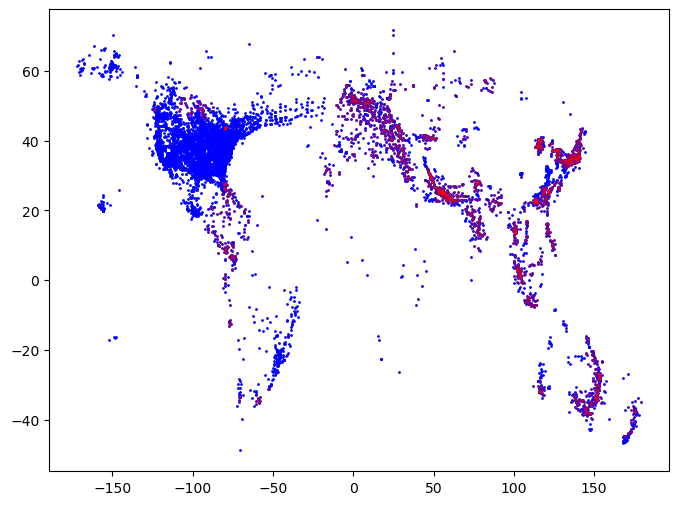

In [30]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['lon'], df['lat'], c='blue', alpha=1, s=1)
plt.scatter(df1['lon'], df1['lat'], c='red', alpha=0.25, s=1)
plt.show()

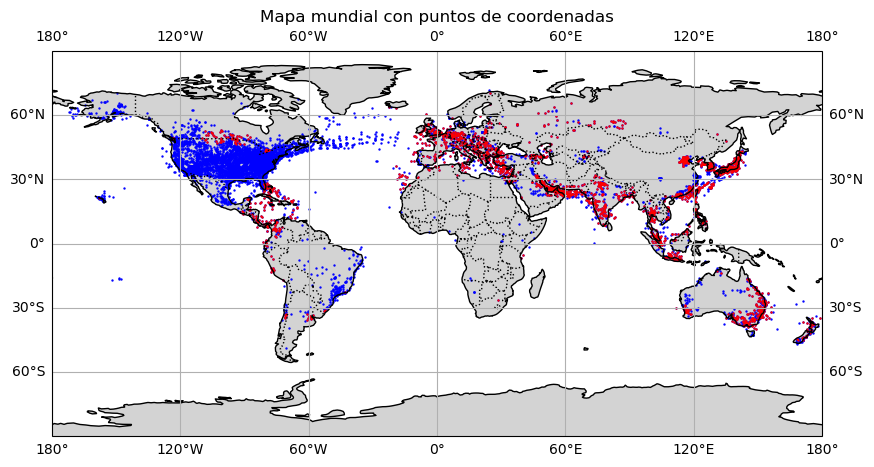

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Crear figura con proyección geográfica
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Dibujar mapa base
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_global()
ax.gridlines(draw_labels=True)

# Dibujar puntos en el mapa
ax.scatter(df["lon"], df["lat"], color='blue', s=0.5, transform=ccrs.PlateCarree())
ax.scatter(df1["lon"], df1["lat"], color='red', s=0.5, transform=ccrs.PlateCarree())


plt.title("Mapa mundial con puntos de coordenadas")
plt.show()